In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings. filterwarnings("ignore")

## Question 1 - Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [5]:
# loading data set
survey=pd.read_csv("Survey.csv")
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [6]:
## checking the null and duplicated values
print("sum of null values in each column : " ,"\n",survey.isnull().sum())
print("sum of duplicated rows in data : " ,"\n",survey.duplicated().sum())

sum of null values in each column :  
 response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64
sum of duplicated rows in data :  
 0


In [7]:
## checking the data types of variables
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


In [8]:
## converting the dtypes 
import datetime as dt
survey["collection_date"]=pd.to_datetime(survey["collection_date"]).dt.date
survey.iloc[123,9]=24
survey["age"]=survey["age"].apply(pd.to_numeric)
survey.assembly_no.astype(int)
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   int64  
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(3), object(10)
memory usage: 751.2+ KB


In [9]:
survey.head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603
6,7,2017-05-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283
7,8,2017-05-24,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
9,10,2017-05-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059


## Dividing the income column into two  columns using regex

In [10]:
## replacing the unwanted charecters
survey["income"]=survey["income"].apply(lambda x:str(x).replace(",","").replace("-","").replace("₹","").replace("&",""))
## extracting the min income into a list
a=[]
for i in range(len(survey)):
    a.append(re.findall("BPL\/Below|\s\d+\s+",survey["income"][i]))
## assigning a new column to the list-a
survey["min_income"]=a
## extracting the max income into a list
b=[]
for i in range(len(survey)):
    c=re.sub("BPL\/Below|\s\d+\s+"," ",survey["income"][i])
    b.append(c)
## assigning a new column to the list-a
survey["max_income"]=b
## replacing the unwanted charecters
survey["min_income"]=survey["min_income"].apply(lambda x: str(x).replace("[","").replace("]","").replace("'",""))
survey.min_income=survey.min_income.replace("BPL/Below",np.nan)
survey.max_income=survey.max_income.replace(" above",np.nan)

## Filling the Null Values

In [11]:
survey.fillna({"min_income":int(survey["min_income"].median()),"max_income":int(survey["max_income"].median())},inplace=True)
survey
survey["min_income"]=survey["min_income"].astype(int)
survey["max_income"]=survey["max_income"].astype(int)

## Question 2 - How many samples were collected each day?

In [12]:
survey.collection_date.value_counts()

2017-05-24    1479
2017-05-25     998
2017-05-28     761
2017-05-27     665
2017-05-29     620
2017-06-01     607
2017-05-26     598
2017-05-30     582
2017-05-31     557
Name: collection_date, dtype: int64

## Question 3 - What proportion of the total respondents were aged less than 45?

In [13]:
len(survey[survey["age"]<45])/len(survey)*100

93.18479685452162

## Question 4 - Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation.

In [14]:
survey["age_group"]=pd.cut(survey['age'],bins=[17,25,40,55,99],labels=["18-25","25-40","40-55","55+"])
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,min_income,max_income,age_group
0,1,2017-05-24,Rural,12th Pass,30000 50000,BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,30000,50000,25-40
1,2,2017-05-24,Rural,Graduate,20000 30000,RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,20000,30000,25-40
2,3,2017-05-24,Rural,Graduate,5000 10000,JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,5000,10000,18-25
3,4,2017-05-24,Urban,Graduate,10000 20000,RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,10000,20000,25-40
4,5,2017-05-24,Rural,Graduate,50000 80000,JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,50000,80000,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,BPL/Below 5000,JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,10000,5000,18-25
6863,6864,2017-06-01,Rural,Graduate,BPL/Below 5000,RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,10000,5000,25-40
6864,6865,2017-06-01,Urban,Graduate,5000 10000,JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,5000,10000,18-25
6865,6866,2017-06-01,Rural,Professional Education,10000 20000,BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,10000,20000,18-25


## Question 5 - How many samples were collected for each age-group? Which age-group had the most samples?

In [15]:
df=pd.DataFrame(survey["age_group"].value_counts())
df.reset_index(inplace=True)
print("sample collected for each group : " ,df.rename(columns={"index":"age_group","age_group":"count"}))
print(f" from age group {df.iloc[0,0]} max samples({df.iloc[0,1]}) are collected")

sample collected for each group :    age_group  count
0     25-40   3423
1     18-25   2692
2     40-55    644
3       55+    108
 from age group 25-40 max samples(3423) are collected


## Question 6 - What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [16]:
x=len(survey[(survey["Vote_Now"]=="RJD") & (survey["Past_Vote"]=="RJD") ])/len(survey)
print(f'There are {(round(x,4)*100)} % of respondent for RJD both in Vote_Now & Past_Vote')

There are 11.81 % of respondent for RJD both in Vote_Now & Past_Vote


## Question 7 - For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

### Method1

In [17]:
survey.groupby("collection_date")[["CM_satisfaction"]].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

,CM_satisfaction
collection_date,
2017-05-24,9.871535
2017-05-25,9.519038
2017-05-26,9.866221
2017-05-27,8.120301
2017-05-28,12.089356
2017-05-29,11.774194
2017-05-30,11.168385
2017-05-31,11.131059
2017-06-01,12.355848


### Method2

In [18]:
z=[]
d=survey["collection_date"].unique()
for i in d:
    z.append(len(survey[(survey["CM_satisfaction"]=="Fully Satisfied") & (survey["collection_date"]==i)])/len(survey[survey["collection_date"]==i])*100)
df1=pd.DataFrame(z,index=survey["collection_date"].unique())
df1.reset_index(inplace=True)
df1.rename(columns={"index":"collection_date",0:"CM_satisfaction"},inplace=True)
df1

,collection_date,CM_satisfaction
0,2017-05-24,9.871535
1,2017-05-25,9.519038
2,2017-05-26,9.866221
3,2017-05-27,8.120301
4,2017-05-28,12.089356
5,2017-05-29,11.774194
6,2017-05-30,11.168385
7,2017-05-31,11.131059
8,2017-06-01,12.355848


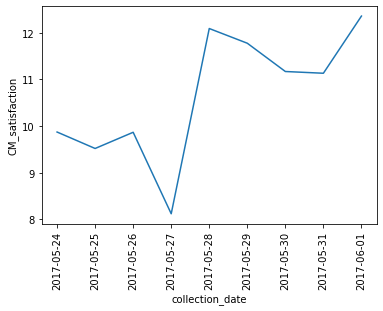

In [19]:
sns.lineplot(data=df1,y="CM_satisfaction",x="collection_date")
plt.xticks(rotation=90)
plt.show();

## Question 8 - In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

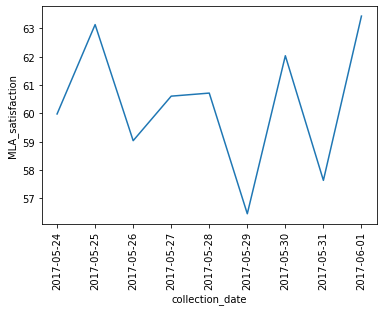

,MLA_satisfaction
collection_date,
2017-05-24,59.972955
2017-05-25,63.126253
2017-05-26,59.030100
2017-05-27,60.601504
2017-05-28,60.709593
2017-05-29,56.451613
2017-05-30,62.027491
2017-05-31,57.630162
2017-06-01,63.426689


In [20]:
a=survey.groupby("collection_date")[["MLA_satisfaction"]].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100)
sns.lineplot(data=a,x="collection_date",y="MLA_satisfaction")
plt.xticks(rotation=90)
plt.show();
a

## Question 9 - Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [21]:
pd.pivot_table(data=survey,index="Past_Vote",columns="Vote_Now",aggfunc="count",values='response_id')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


## Question 10 - Repeat the above question with the cell values as the sum of “weight”.

In [22]:
pd.pivot_table(data=survey,index="Past_Vote",columns="Vote_Now",aggfunc="sum",values="weight")

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


## Question 11 - Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [23]:
df2=survey.groupby(by="age_group")["response_id"].count().to_frame()
df2

,response_id
age_group,
18-25,2692
25-40,3423
40-55,644
55+,108


## Question 12 - Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [24]:
df3=survey.groupby(by="age_group")["Vote_Now"].apply(lambda x:np.sum(x=="JD(U)")).to_frame()
df3

,Vote_Now
age_group,
18-25,216
25-40,245
40-55,55
55+,10


## Question 13 - Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [25]:
pd.merge(df2,df3,on="age_group")

,response_id,Vote_Now
age_group,,
18-25,2692,216
25-40,3423,245
40-55,644,55
55+,108,10


## Uni-Variate Analysis

### Histogram

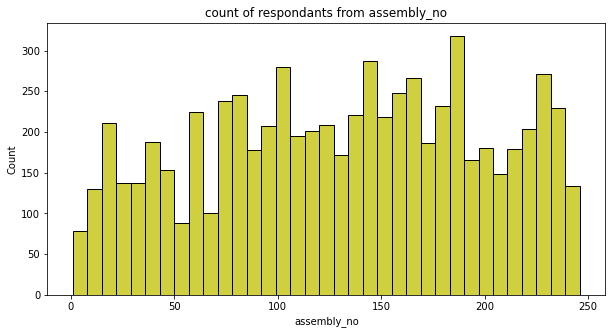

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(ax=ax,x=survey["assembly_no"],binwidth=7,color="y");
plt.title("count of respondants from assembly_no")
plt.show();

## observation
- assembly nos 170-180 consists of more no voters compare to other assembly nos

## Distribution plot

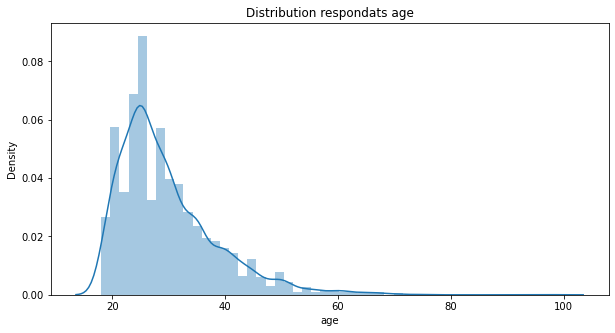

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(ax=ax,x=survey["age"])
plt.xlabel("age")
plt.title("Distribution respondats age")
plt.show();

## observations
- most of the voters are from 22-38 age group

## Pie Chart

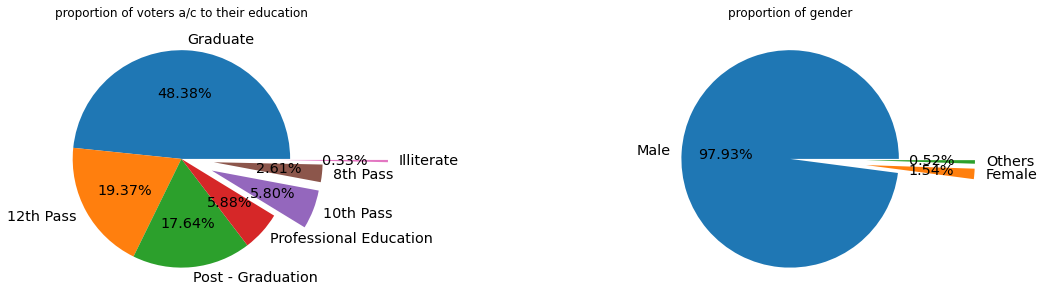

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.pie(x=survey["education"].value_counts(),labels=survey["education"].value_counts().index,autopct="%.2f%%",explode=[0,0,0,0,0.3,0.3,0.9],textprops={'size': 'x-large'})
ax1.title.set_text("proportion of voters a/c to their education")
ax2.pie(x=survey["gender"].value_counts(),labels=survey["gender"].value_counts().index,autopct="%.2f%%",explode=[0,0.7,0.7],textprops={'size': 'x-large'})
ax2.title.set_text("proportion of gender");


## observations
- In the first plot we can say that most of the voters are graduates
- In the second plot we can say that most of the voters are male 

In [29]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,min_income,max_income,age_group
0,1,2017-05-24,Rural,12th Pass,30000 50000,BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,30000,50000,25-40
1,2,2017-05-24,Rural,Graduate,20000 30000,RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,20000,30000,25-40


<AxesSubplot:xlabel='age'>

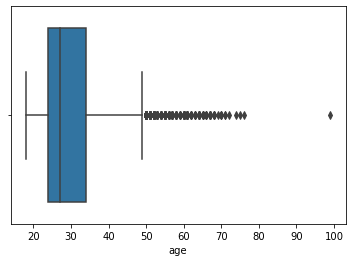

In [30]:
sns.boxplot(survey["age"])

## count plot

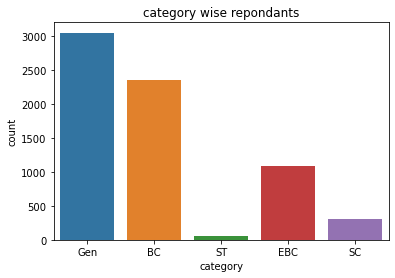

In [31]:
sns.countplot(x=survey["category"])
plt.title("category wise repondants")
plt.show();

## obseravtions
- Most of the respondents are belongs to Gen category

## Bi-Variate Analysis

## bar plot

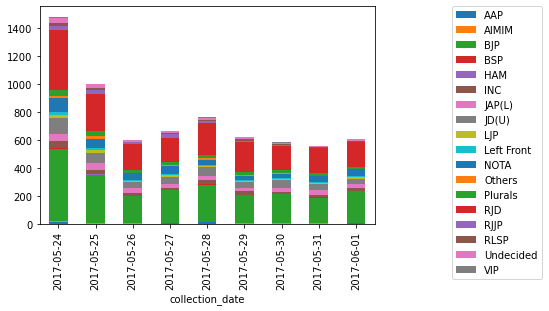

In [32]:
pd.crosstab(survey["collection_date"],survey["Vote_Now"]).plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1.5, 1), borderaxespad=0)
plt.show();

## Observation
- when compare to other days on very first day more no of respondents are surveyed and also most of them casted their vote to BJP

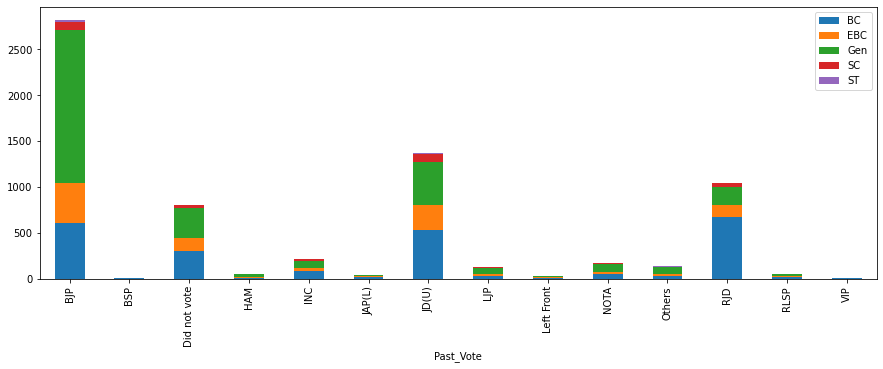

In [33]:
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(survey["Past_Vote"],survey["category"]).plot(ax=ax,kind="bar",stacked=True)
plt.legend()
plt.xticks()
plt.show();

## Observations
- People belongs to Gen category cated their vote mostly to BJP 

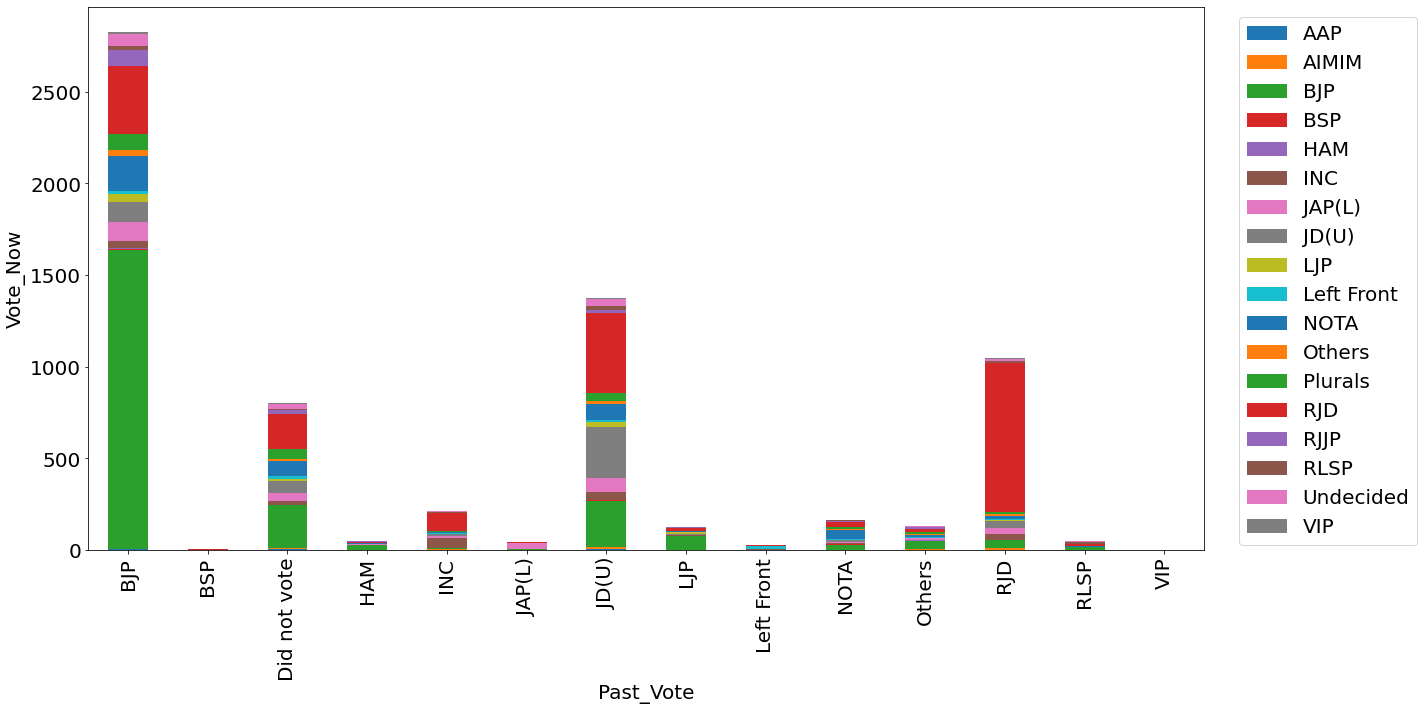

In [34]:
fig,ax=plt.subplots(figsize=(20,10))
pd.crosstab(survey["Past_Vote"],survey["Vote_Now"]).plot(ax=ax,kind="bar",stacked=True)
plt.xlabel("Past_Vote",fontsize=20)
plt.ylabel("Vote_Now",fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1.2,1),prop={"size":20});

## Observations
- Only 1600 respondants casted their vote to BJP out of total respondants who casted their vote to BJP in previous elections 

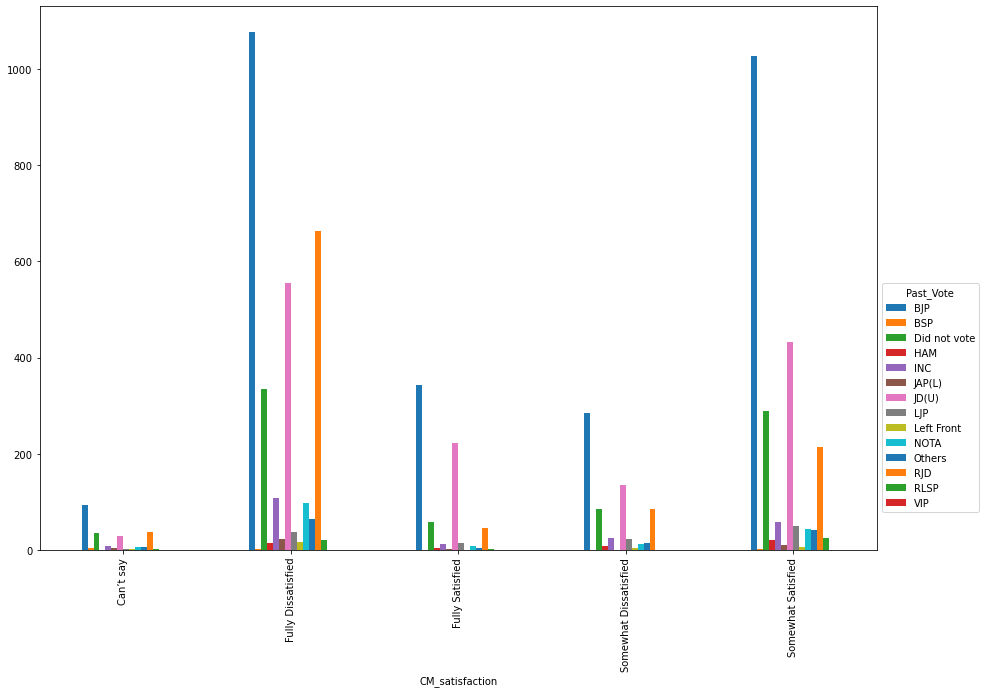

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
pd.crosstab(survey["CM_satisfaction"],survey["Past_Vote"]).plot(ax=ax,kind="bar")
plt.legend(bbox_to_anchor=(1,0.5),title=("Past_Vote"),fontsize=10);

## Observations
- Most of of the Fully Dissatisfied respondants casted their vote to BJP

## Violin PLot

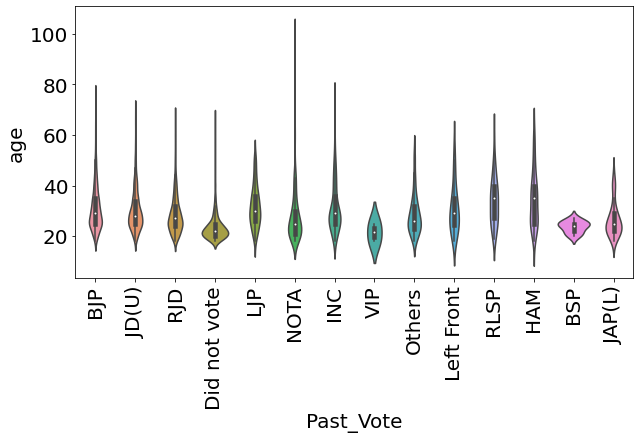

In [36]:
fig,axes=plt.subplots(figsize=(10,5))
sns.violinplot(ax=axes,x="Past_Vote",y="age",data=survey)
plt.xlabel("Past_Vote",fontsize=20)
plt.ylabel("age",fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20);

## Observattion
- People belongs 18-35 age group only casted their vote of BSP

## Line PLot

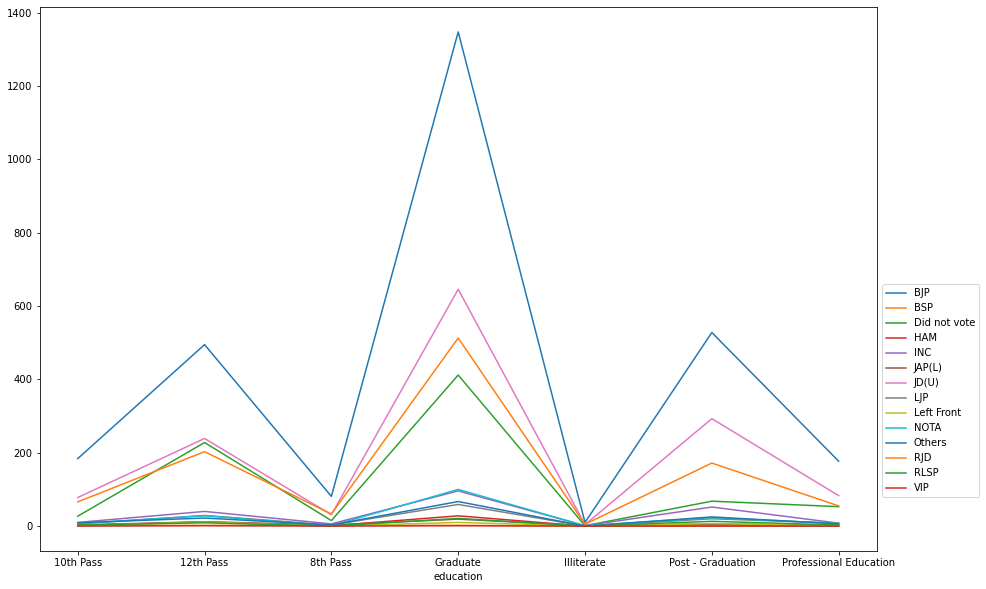

In [37]:
fig,ax=plt.subplots(figsize=(15,10))
pd.crosstab(survey["education"],survey["Past_Vote"]).plot(ax=ax,kind="line")
plt.legend(bbox_to_anchor=(1,0.5));

## Observation
- illiterate voting % is very less

## Multi- Variate Analysis

## Heat Map

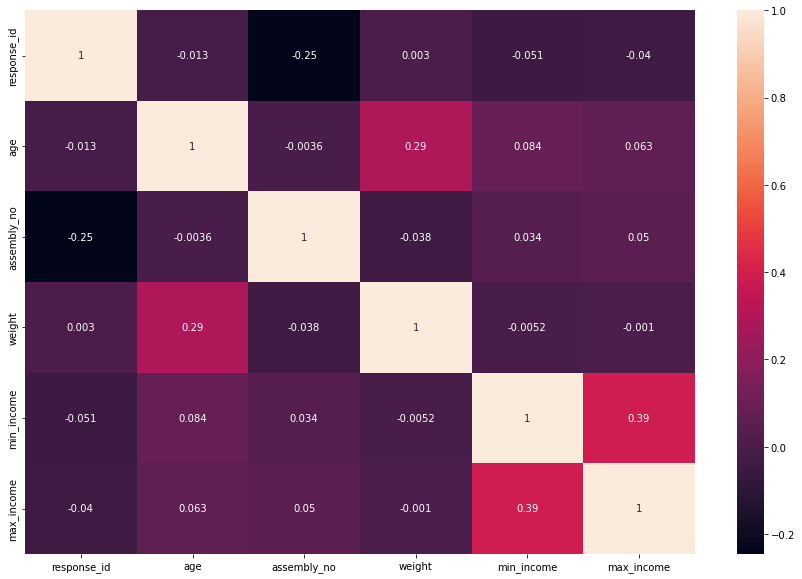

In [38]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(survey.corr(),ax=ax,annot=True);

## Observation
- age and weight are highly correlated